In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 23 - Customer Segmentation using K-Means Clustering\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: ylabel='Frequency'>

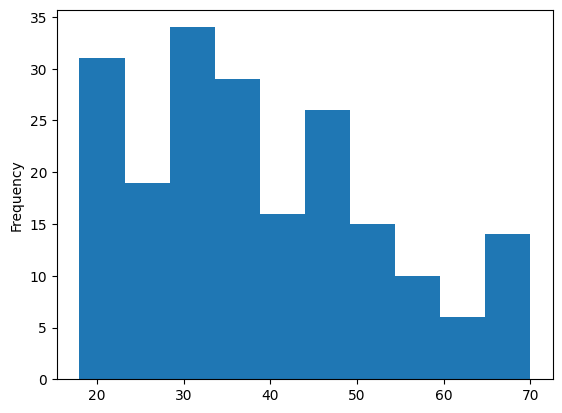

In [8]:
df.Age.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

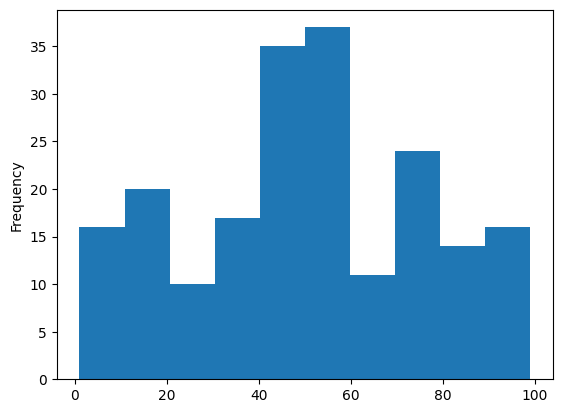

In [9]:
df['Spending Score (1-100)'].plot(kind = 'hist')

In [10]:
df.Gender.value_counts()

mapping = {
    'Male': 0,
    'Female': 1
}

df['Gender'] = df['Gender'].map(mapping)

In [11]:
X = df.drop(columns = ['CustomerID', 'Age', 'Gender'])

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
inertias = [] 
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    inertias.append(kmeans.inertia_)

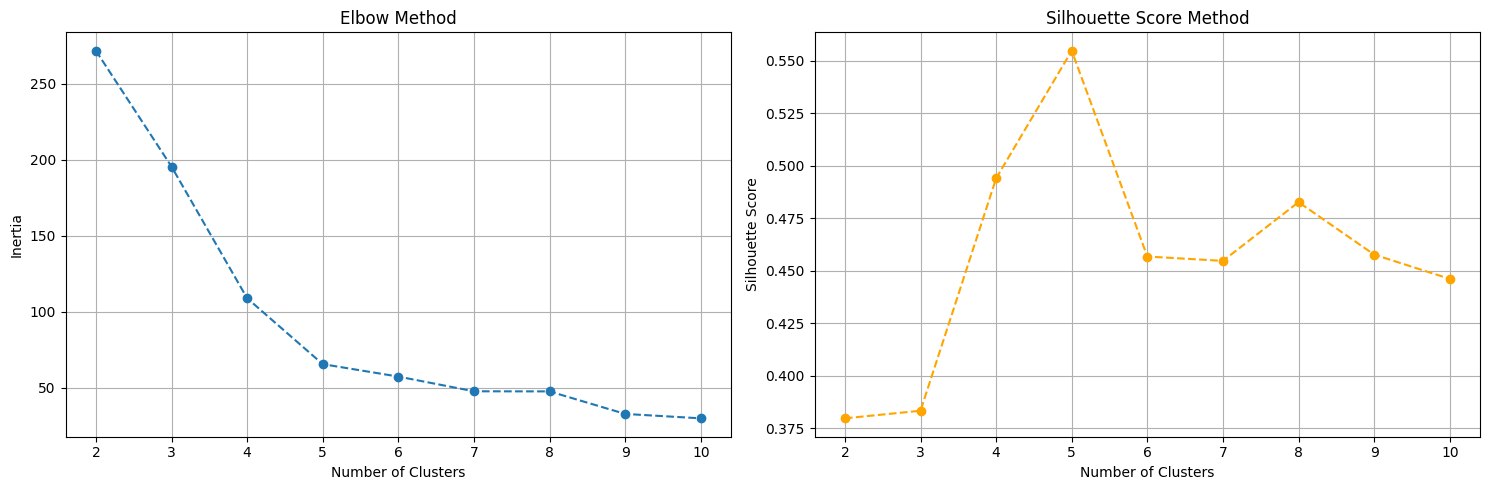

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
axes[0].plot(range(2, 11), inertias, marker='o', linestyle='--')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

# Silhouette plot
axes[1].plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='orange')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Method')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [15]:
kmeans_final = KMeans(n_clusters=5, random_state=2)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

print("Cluster Distribution:")
print(df['Cluster'].value_counts().sort_index())

print("\nCluster Characteristics:")
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

Cluster Distribution:
Cluster
0    81
1    35
2    23
3    39
4    22
Name: count, dtype: int64

Cluster Characteristics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        41.114286           88.200000               17.114286
2        45.217391           26.304348               20.913043
3        32.692308           86.538462               82.128205
4        25.272727           25.727273               79.363636


In [16]:
# Silhouette Score:0.36 @ 7
# 0.5 to 1.0 = Excellent separation
# 0.3 to 0.5 = Reasonable separation
# 0.2 to 0.3 = Weak separation
# < 0.2 = Poor clustering

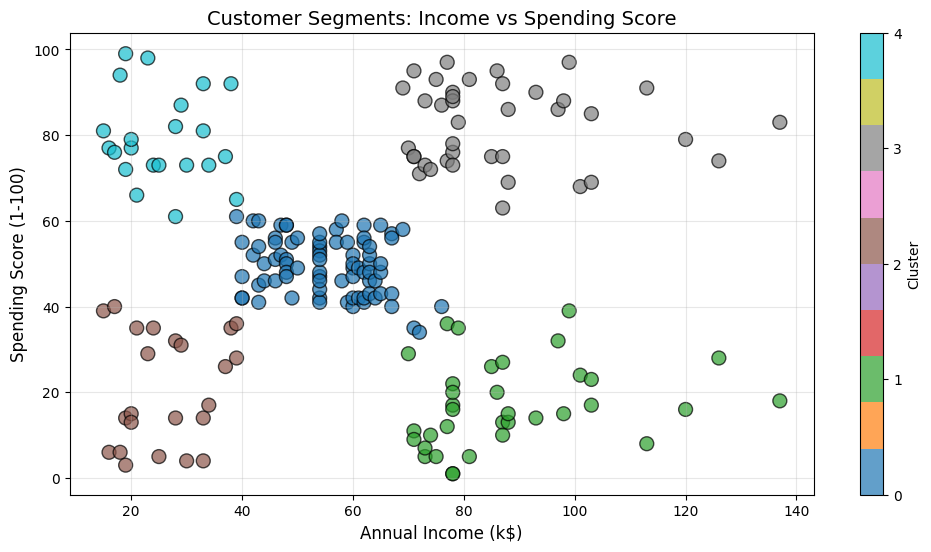

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Annual Income (k$)'], 
                     df['Spending Score (1-100)'], 
                     c=df['Cluster'], 
                     cmap='tab10', 
                     s=100, 
                     alpha=0.7,
                     edgecolors='black')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Customer Segments: Income vs Spending Score', fontsize=14)
cbar = plt.colorbar(scatter, label='Cluster')
cbar.set_ticks([0, 1, 2, 3, 4])
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
db_score = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Score: {db_score:.3f}")

#< 1.0 = Excellent
# 1.0 - 2.0 = Good
# > 2.0 = Poor separation

# Lower is better (measures cluster compactness vs separation):

Davies-Bouldin Score: 0.572
